# Decision Tree Implementation from Scratch


Working and experimenting with decision trees. Initially, I will be implement a decision tree classifier by choosing thresholds based on various impurity measures and reporting the scores. Later, I'll experiment with the scikit-learn implementation of decision trees, and how various other parameters can be leveraged for better performance.

The dataset is a very simple one, the [banknote authentication dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). It has 5 columns, the first 4 are the features, and the last one is the class label. The features are the variance, skewness, curtosis and entropy of the [wavelet transformed](https://en.wikipedia.org/wiki/Wavelet_transform) image of the banknote. The class label is 1 if the banknote is authentic, and 0 if it is forged. The data is present in `bankAuth.txt`. There are a total of 1372 samples in the dataset.

### Imports

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



### Impurity Measures

Decision trees are only as good as the impurity measure used to choose the best split. In this section, you will be required to implement the following impurity measures and use them to build a decision tree classifier.

1. Gini Index
2. Entropy/Log Loss
3. Misclassification Error


Write functions that calculate the impurity measures for a given set of labels. The functions should take in a list of labels and return the impurity measure.

In [109]:
# your code here
def entropy(y):
  class_labels=np.unique(y)
  entropy=0
  q=len(y)
  for cls in class_labels:

    p=len(y[y==cls])
    # print(p,cls)
    pob=p/q
    # print(pob)
    entropy += -pob*np.log2(pob)
  return entropy




In [ ]:
def gini_index(y):
  class_labels=np.unique(y)
  gini_impurity=0
  q=len(y)
  for cls in class_labels:
    p=len(y[y==cls])
    pob=p/q
    
    gini_impurity+=np.power(pob,2)
  return 1-gini_impurity

In [ ]:

def Misclassification(y):
  class_labels=np.unique(y)
  me=0
  q=len(y)
  list_m2=[]
  for cls in class_labels:

    p=len(y[y==cls])
    # print(p,cls)
    pob=p/q
    list_m2.append(pob)
  return 1-max(list_m2)


### Decision Tree

Fit a decision tree using any one of the above impurity measures with a depth of 3. This means you will have eight leaf nodes and seven internal nodes. Report the threshold values at each internal node and the impurity measure at the final leaf node with the label. Also report the accuracy of the classifier on the training and test data (instructions for splitting the data will be given in the end).

In [110]:
# your code here
class Node():
  def __init__(self, index=None, threshold=None, left=None, right=None, info_gain=None, value=None,empurity=None):
    self.index = index
    
    self.left,self.right = left,right
    self.threshold,self.value = threshold,value
    self.info_gain,self.empurity= info_gain,empurity
    
class DecisionTreeClassifier1():
    
    def calculate_leaf_value(self, Y):
      m1=max(list(Y),key=list(Y).count)
      return m1
    
    
    def __init__(self,max_depth=3,min_samples_split=2,mode="gini_index"):
      self.min_samples_split = min_samples_split
      self.root = None
      self.max_depth = max_depth
      self.mode=mode
        
        
        
    def calculate_inmp(self,Y,mode):
      if(mode=="entropy"):
        return entropy(Y)
      elif(mode=="gini_index"):
        return gini_index(Y)
      else:
        return Misclassification(Y)
    
    
    
        
    def get_best_split(self, dataset, num_samples, num_features):
      max_info_gain = -float("inf")
      best_split = {}
    
      for index in range(num_features):
          feature_values = dataset[:,index]
          possible_thresholds = np.unique(feature_values)
          for thr in possible_thresholds:
              dataset_left=self.split_left(dataset, index, thr)
              dataset_right =self.split_right(dataset,index,thr)
              l1=len(dataset_left)
              l2=len(dataset_right)
              if(l1>0 and l2>0):
                curr_info_gain = self.information_gain(dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1],self.mode)
                y=dataset[:, -1]
                left_y = dataset_left[:, -1]
                right_y=dataset_right[:, -1]    
                if curr_info_gain>max_info_gain:
                  best_split["dataset_left"],best_split["dataset_right"] = dataset_left,dataset_right
                  best_split["index"],best_split["threshold"]=index,thr
                  max_info_gain,best_split["info_gain"] = curr_info_gain,curr_info_gain
      return best_split
    
    
    
    
    def information_gain(self,parent,l_child,r_child,mode):
        no_left_child=len(l_child)
        no_right_child=len(r_child)
        no_of_parents=len(parent)
        weight_l = no_left_child/no_of_parents
        weight_r = no_right_child/no_of_parents
        if(mode=="entropy"):
          a1=entropy(parent)
          a2=entropy(l_child)
          a3=entropy(r_child)
          inf_g=a1-weight_l*a2-weight_r*a3
        elif(mode=="Misclassification"):
          a1=Misclassification(parent)
          a2=Misclassification(l_child)
          a3=Misclassification(r_child)
          inf_g=a1-weight_l*a2-weight_r*a3
        else:
          a1=gini_index(parent)
          a2=gini_index(l_child)
          a3=gini_index(r_child)
          inf_g=a1-weight_l*a2-weight_r*a3
        return inf_g
    
    
    
    def split_left(self, dataset, index, threshold):
      return np.array([row for row in dataset if row[index]<=threshold])




    def split_right(self, dataset, index, threshold):
      return np.array([row for row in dataset if row[index]>threshold])
        

    
    def print_tree(self, tree=None, indent=" "):
      if not tree:
        tree = self.root
      if(tree.value is not None):
        print("Leaf_Node-> ",tree.value," impurity->  ",tree.empurity)
      else:
        print("col_"+str(tree.index), "<=", tree.threshold, "information_gain->", tree.info_gain)
        print()
        print("%sleft:" % (indent), end="internal_node  ")
        self.print_tree(tree.left, indent + indent)
        print()
        print("%sright:" % (indent), end="internal_node  ")
        self.print_tree(tree.right, indent + indent)
        
        
    def predict(self, X):
      return [self.make_prediction(x, self.root) for x in X]


    def fit(self, X, Y):
      dataset1 = np.concatenate((X, Y), axis=1)
      dataset=dataset1
      self.root = self.build_tree(dataset,0)
    
    
    def build_tree(self, dataset, curr_depth):  
      X=dataset[:,:-1]
      samples,features = np.shape(X)
      Y=dataset[:,-1]
      if(samples>=self.min_samples_split and curr_depth<=self.max_depth):
          best_split = self.get_best_split(dataset,samples,features)
          b_split=best_split["info_gain"]
          if(b_split>0):
            bd_slit_left,bd_slit_right=best_split["dataset_left"],best_split["dataset_right"]
            left_subtree = self.build_tree(bd_slit_left, curr_depth+1)
            
            best_split_index,best_split_threshold=best_split["index"],best_split["threshold"]
            right_subtree = self.build_tree(bd_slit_right, curr_depth+1)
            
            return Node(best_split_index,best_split_threshold,left_subtree, right_subtree,b_split)    
      leaf_value = self.calculate_leaf_value(Y)
      emp=self.calculate_inmp(Y,self.mode)
      return Node(value=leaf_value,empurity=emp)


    
    def make_prediction(self,x, tree):
      if tree.value!=None:
        return tree.value
      return self.make_prediction(x, tree.right) if x[tree.index]>tree.threshold else self.make_prediction(x, tree.left)

In [111]:

data = pd.read_csv('bankAuth.txt')
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)



depth=3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)
classifier = DecisionTreeClassifier1(max_depth=depth-1,min_samples_split=2,mode="gini_index")
classifier.fit(X_train,Y_train)
classifier.print_tree()


Y_pred_test = classifier.predict(X_test) 
accuracy_test=accuracy_score(Y_test, Y_pred_test)


Y_pred_train= classifier.predict(X_train)
accuracy_train=accuracy_score(Y_train, Y_pred_train)

print("Train accuracy-> ",accuracy_train)
print("Test accuracy-> ",accuracy_test)


col_0 <= 0.31803 information_gain-> 0.23928749237059924

 left:internal_node  col_1 <= 7.5032 information_gain-> 0.15155095232671079

  left:internal_node  col_0 <= -0.46651 information_gain-> 0.013098345530093383

    left:internal_node  Leaf_Node->  1.0  impurity->   0.06869581534997171

    right:internal_node  Leaf_Node->  1.0  impurity->   0.38627218934911234

  right:internal_node  col_0 <= -5.3857 information_gain-> 0.2777777777777777

    left:internal_node  Leaf_Node->  1.0  impurity->   0.0

    right:internal_node  Leaf_Node->  0.0  impurity->   0.0

 right:internal_node  col_2 <= -4.4738 information_gain-> 0.053335933873589064

  left:internal_node  col_0 <= 2.3917 information_gain-> 0.328180737217598

    left:internal_node  Leaf_Node->  1.0  impurity->   0.0

    right:internal_node  Leaf_Node->  0.0  impurity->   0.0

  right:internal_node  col_0 <= 1.581 information_gain-> 0.027338189730411917

    left:internal_node  Leaf_Node->  0.0  impurity->   0.38677764565992856



### `sklearn` Decision Tree Experiments

1. Scikit-learn has two decision tree implementations: [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). 

When would you use one over the other? What would you use in the case of the banknote authentication dataset? Explain the changes that need to be made in the dataset to use the other implementation.

2. Fit a decision tree to the training set. Change various parameters and compare them to one another. Mainly try and experiment with the `criterion`, `max_depth` and `min_samples_split` parameters. Report the accuracy on the training and test set for each of the experiments while varying the parameters for comparison purposes.

3. Plot your trees !! (optional) (for visualization)

```python
from sklearn.tree import plot_tree

def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    plot_tree(tree, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None
```

`Ans 1 `  In given dataset We can use DecisionTreeClassifier because
regression is used when we are trying to predict an output variable that is continuous. Whereas, classification is used when we are trying to predict the class that a set of features should fall into and in given dataset we pridict the class that is either "1"or "0" so we can use DecisionTreeClassifier.

for using DecisionTreeRegressor we have to change our output column of dataset use realnumber instead of 0,1


In [112]:
# your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
def impsk(criterion,max_depth,min_samples_split):
  return DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split)

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [113]:
data = pd.read_csv('bankAuth.txt',header=None)
print(data.head())

         0       1       2        3  4
0  3.62160  8.6661 -2.8073 -0.44699  0
1  4.54590  8.1674 -2.4586 -1.46210  0
2  3.86600 -2.6383  1.9242  0.10645  0
3  3.45660  9.5228 -4.0112 -3.59440  0
4  0.32924 -4.4552  4.5718 -0.98880  0


In [114]:
print(data.describe())

                 0            1            2            3            4
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [115]:
# your code here
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


In [116]:
data.corr(method='pearson')

,0,1,2,3,4
0,1.000000,0.264026,-0.380850,0.276817,-0.724843
1,0.264026,1.000000,-0.786895,-0.526321,-0.444688
2,-0.380850,-0.786895,1.000000,0.318841,0.155883
3,0.276817,-0.526321,0.318841,1.000000,-0.023424
4,-0.724843,-0.444688,0.155883,-0.023424,1.000000


### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [117]:
# your code here
from sklearn.model_selection import train_test_split
X1 = data.iloc[:, :-1].values
Y1 = data.iloc[:, -1].values.reshape(-1,1)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=.2, random_state=41)
print(X_train1)


[[ 5.3063    5.2684   -2.8904   -0.52716 ]
 [-0.11783  -1.5789    8.03     -0.028031]
 [-3.38     -0.7077    2.5325    0.71808 ]
 ...
 [ 3.7352    9.5911   -3.9032   -3.3487  ]
 [-3.0193    1.7775    0.73745  -0.45346 ]
 [-0.49241   0.89392  -1.6283   -0.56854 ]]


In [118]:
print(X_test1)

[[ 0.062525  2.9301   -3.5467   -2.6737  ]
 [ 0.23874   2.0879   -3.3522   -0.66553 ]
 [-2.6406   -4.4159    5.983    -0.13924 ]
 ...
 [ 2.1265    6.8783    0.44784  -2.2224  ]
 [ 0.26637   0.73252  -0.67891   0.03533 ]
 [ 2.1274    5.1939   -1.7971   -1.1763  ]]


### Denouement

Use this place to report all comparisons and wrap up the calls to the functions written above.

,criterion,max_depth,min_samples_split,accuracy_score_test,accuracy_score_train
0,gini,3,2,0.950437,0.931907
1,gini,3,3,0.950437,0.931907
2,gini,3,5,0.950437,0.931907
3,gini,5,2,0.985423,0.986381
4,gini,5,3,0.985423,0.986381
5,gini,5,5,0.985423,0.986381
6,gini,8,2,0.991254,1.000000
7,gini,8,3,0.988338,0.998054
8,gini,8,5,0.988338,0.997082
9,entropy,3,2,0.944606,0.956226


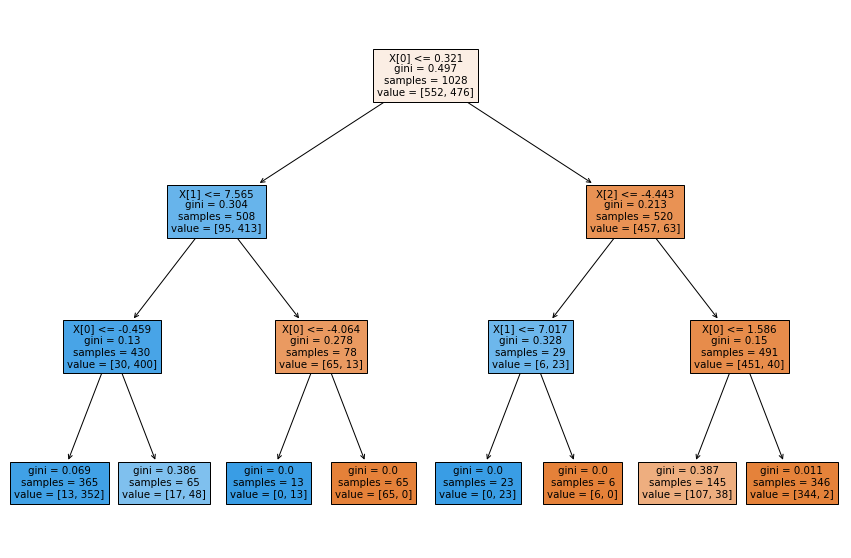

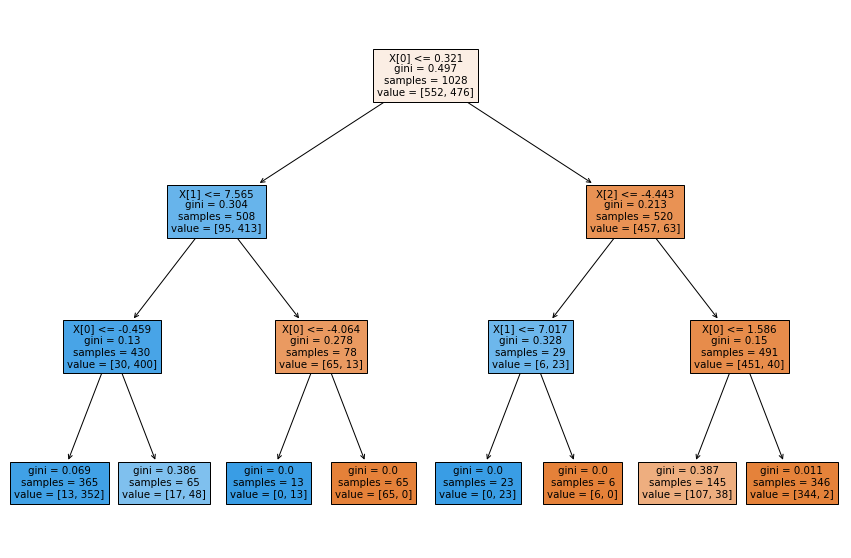

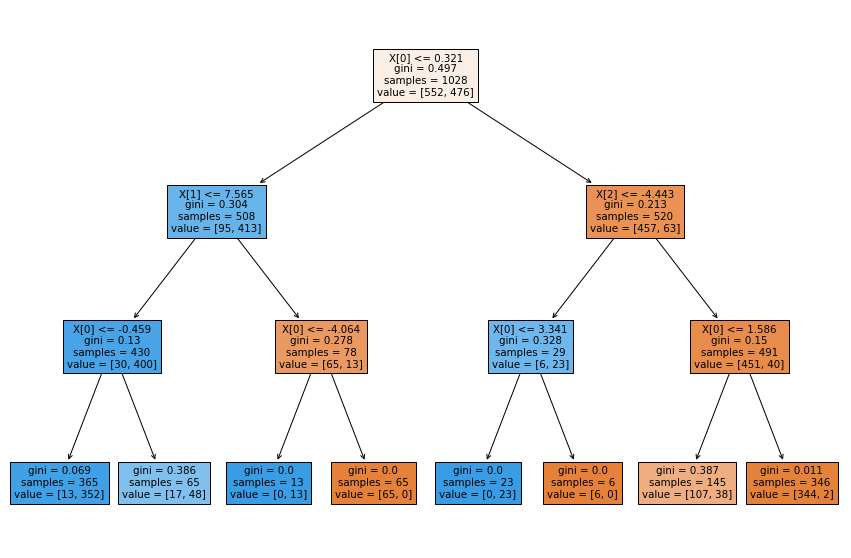

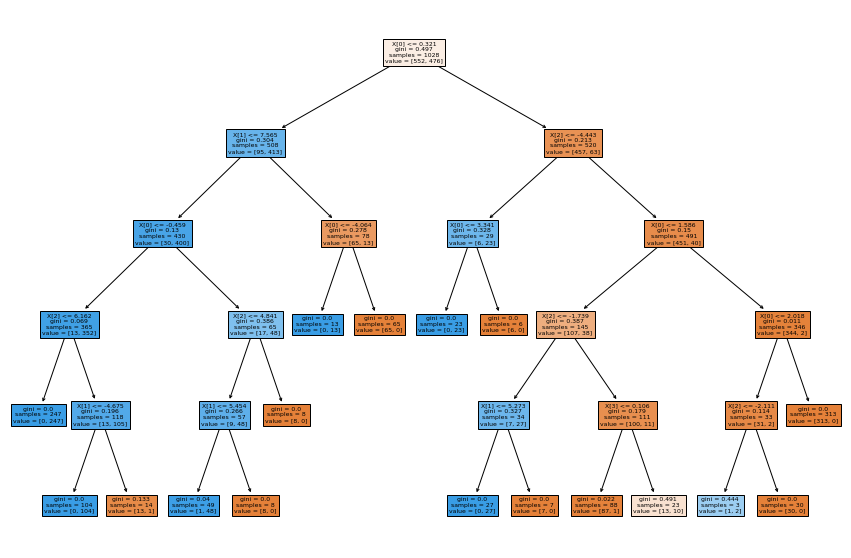

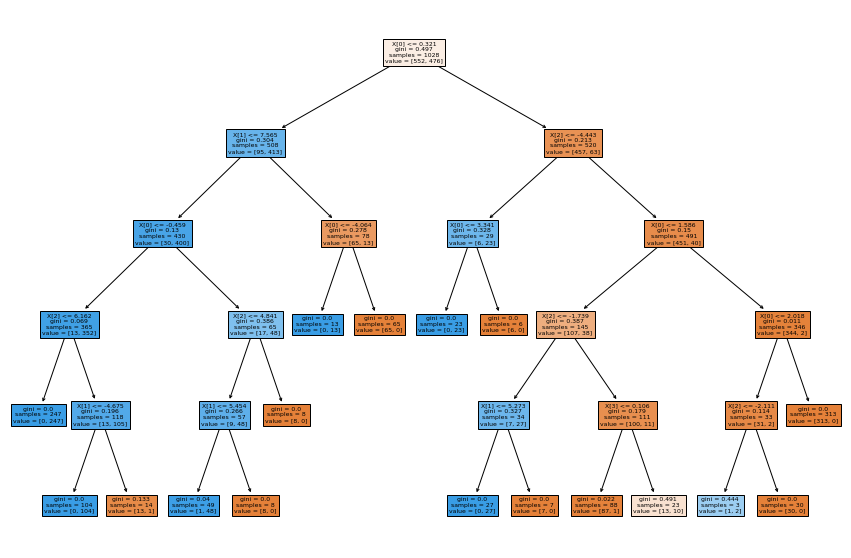

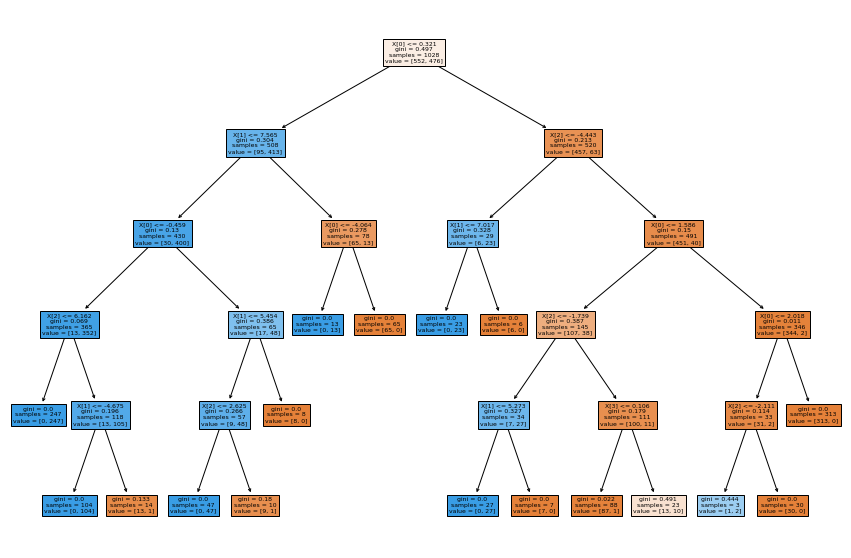

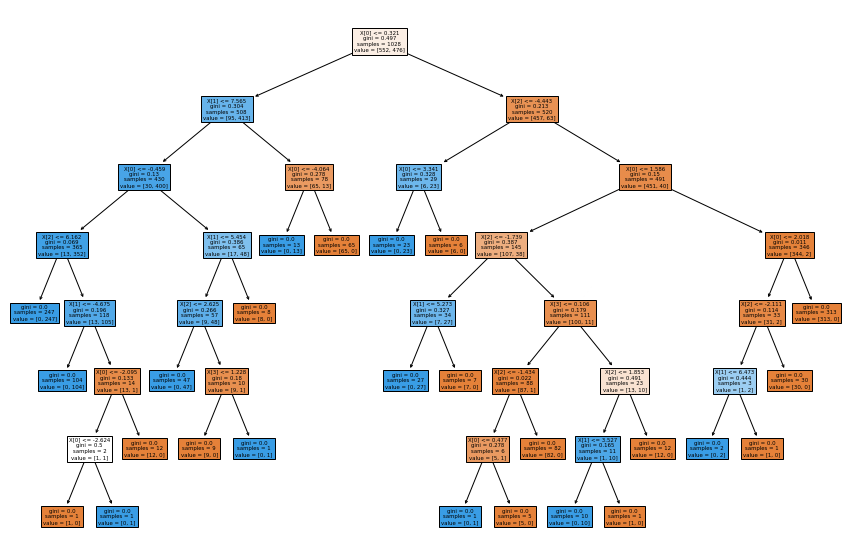

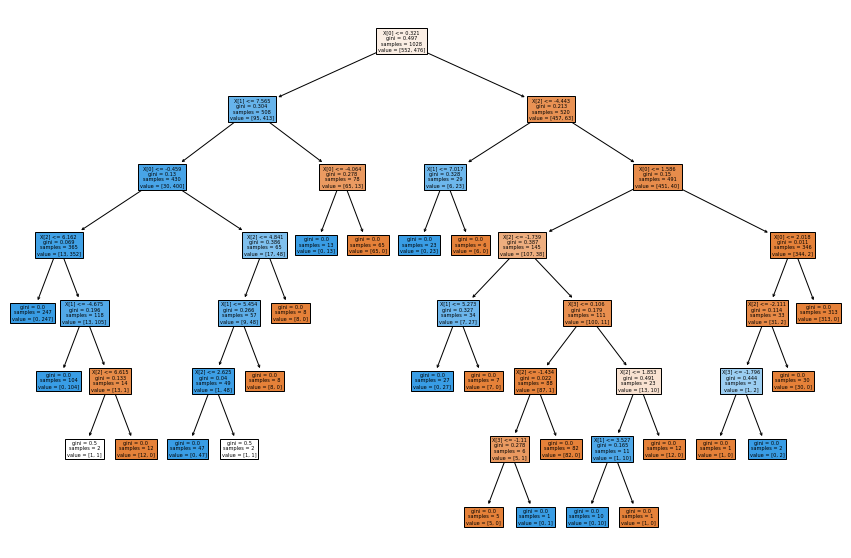

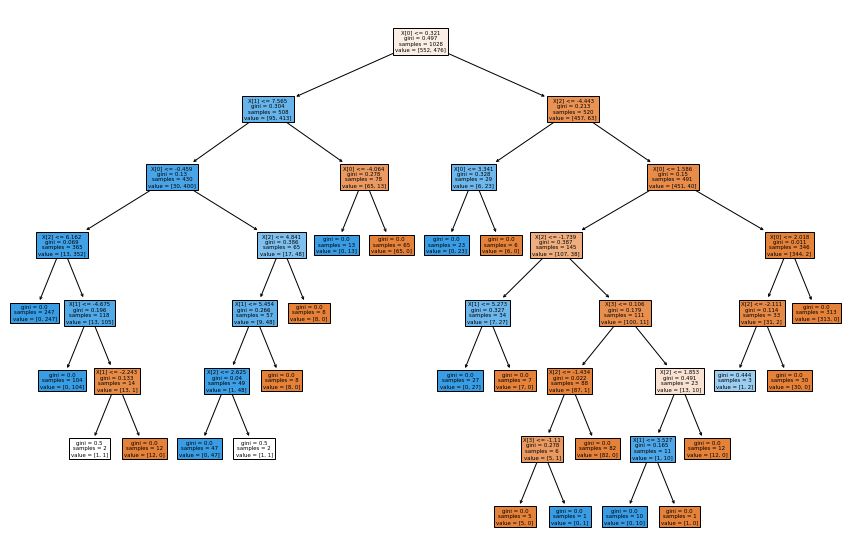

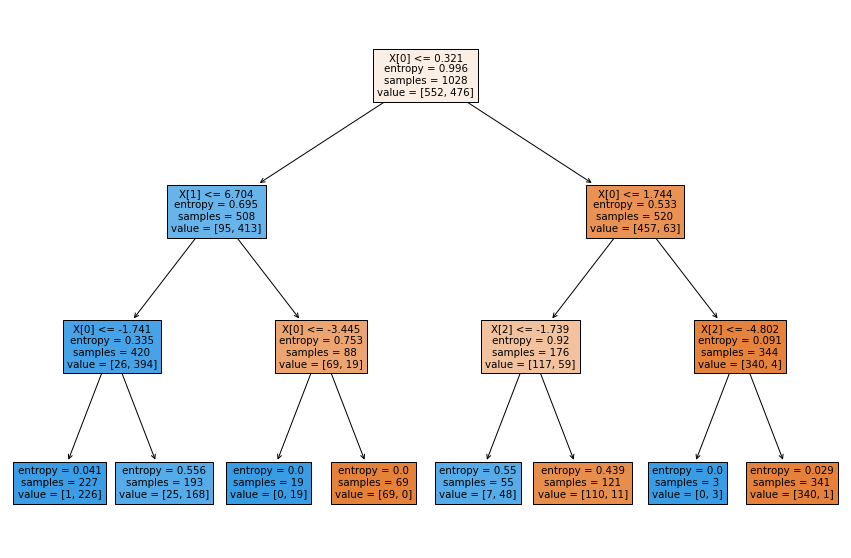

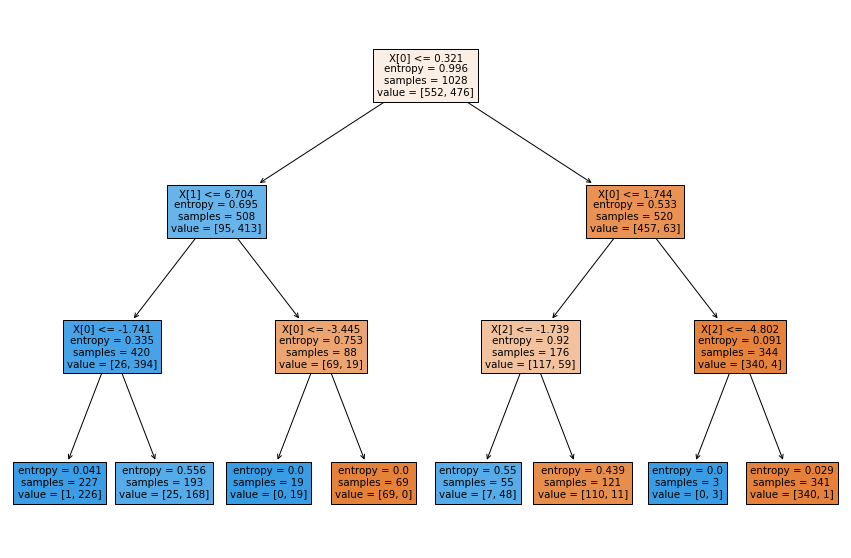

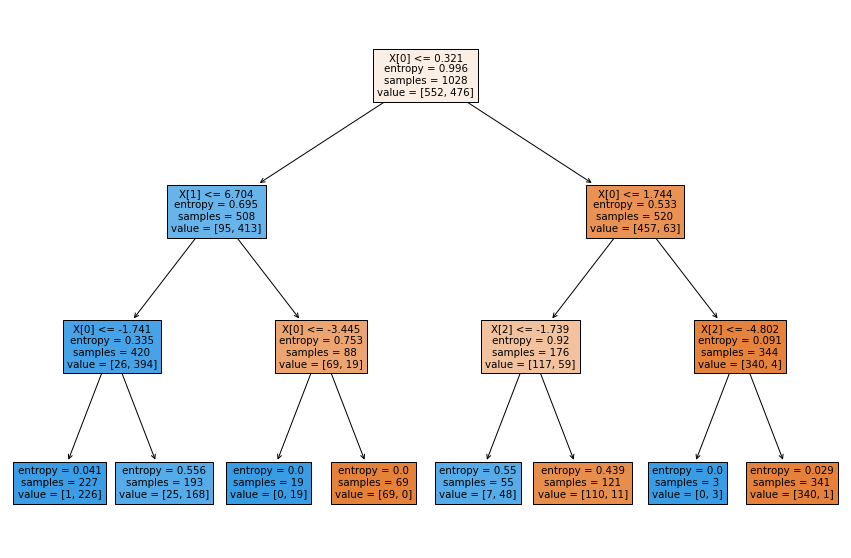

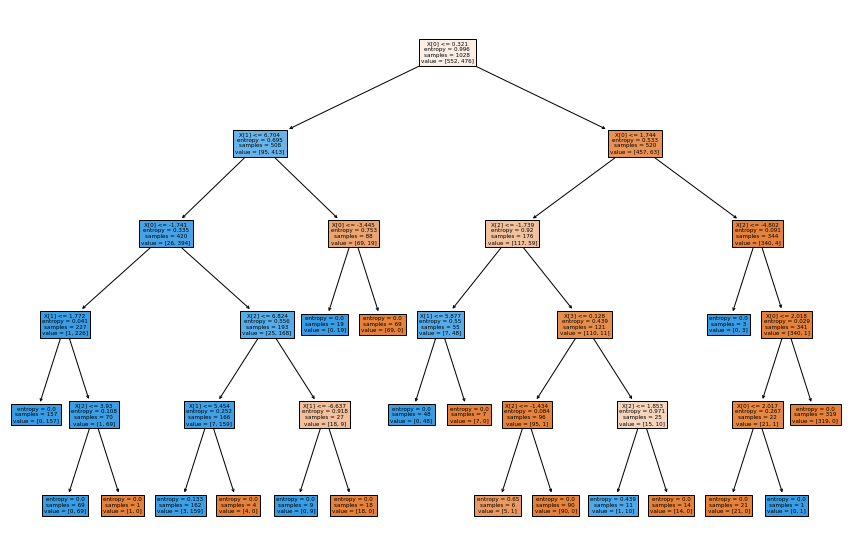

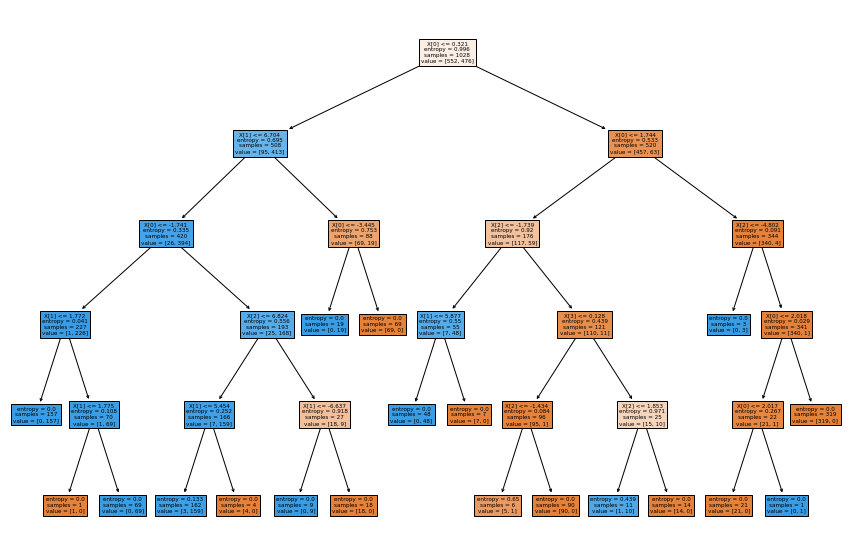

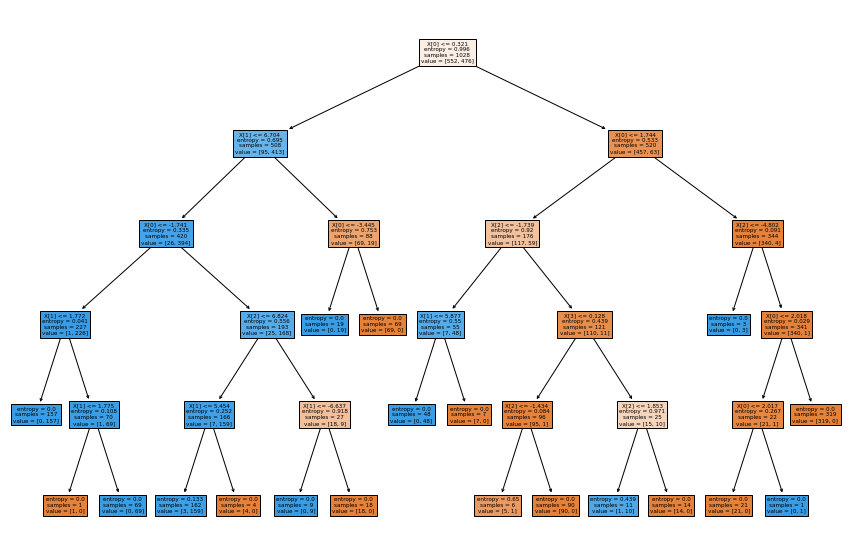

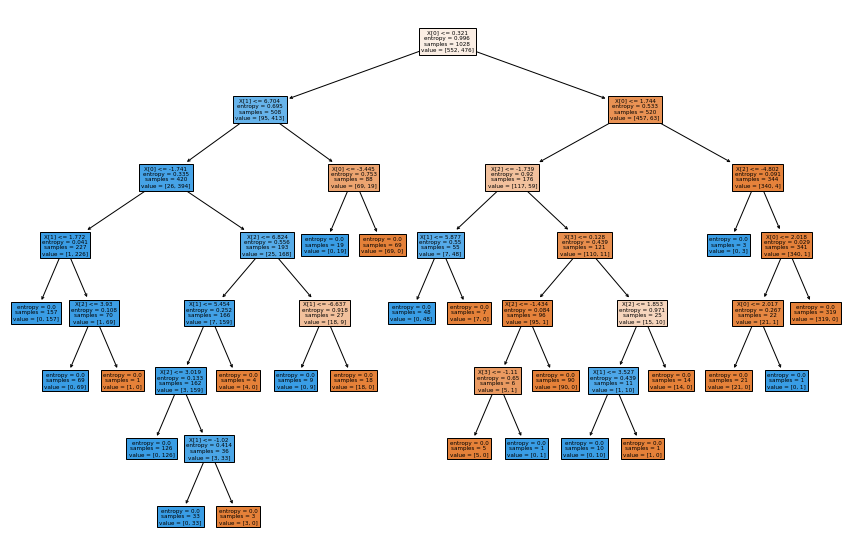

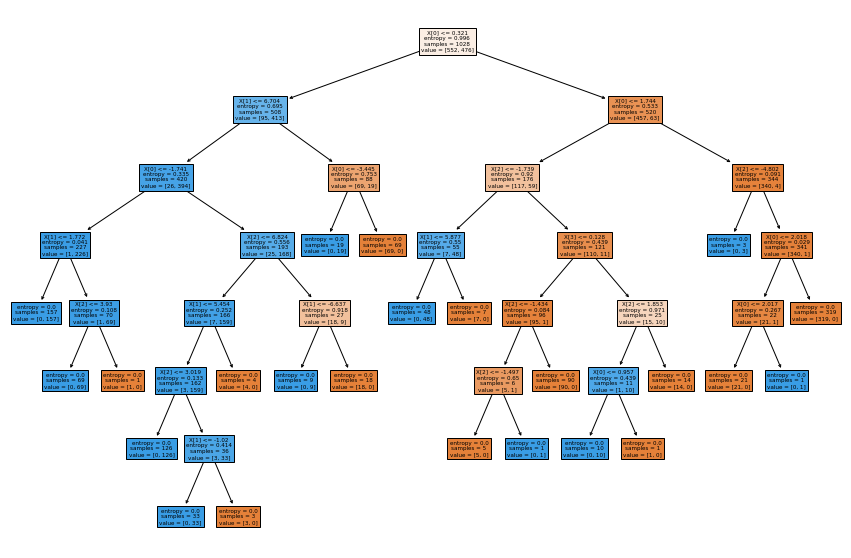

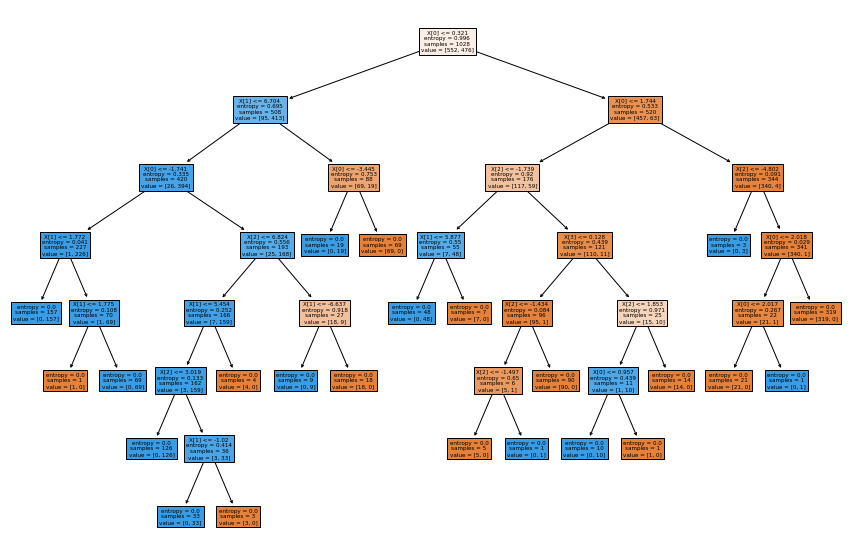

In [119]:
# your code here
result_table=pd.DataFrame(columns = ["criterion","max_depth","min_samples_split","accuracy_score_test","accuracy_score_train"])
# result_table.append()
list_criterion=['gini','entropy']
for criterion in list_criterion:
  for max_depth in [3,5,8]:
    for min_samples_split in [2,3,5]:
      clf_model = impsk(criterion,max_depth,min_samples_split)
      clf_model.fit(X_train,Y_train)
      y_predict = clf_model.predict(X_test)
      y_predict_train = clf_model.predict(X_train)
      acru12=accuracy_score(Y_test,y_predict)
      acc13=accuracy_score(Y_train,y_predict_train)
      result_table=result_table.append({"criterion":criterion,"max_depth":max_depth,"min_samples_split":min_samples_split,"accuracy_score_test":acru12,"accuracy_score_train":acc13},ignore_index = True)
      plt.figure(figsize=(15,10))
      tree.plot_tree(clf_model,filled=True)


result_table